In [1]:
%reload_ext autoreload
%autoreload 2`

In [2]:
%matplotlib inline

import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import gridspec
import cartopy.crs as ccrs
from numba import njit

from glob import glob

from xhistogram.xarray import histogram
import julian
import datetime
import cftime
#import xrft


In [3]:
plt.rcParams['font.family'] = 'STIX Two Text'
plt.rcParams.update({"font.size":12})
#savefig_kws=dict(bbox_inches="tight", facecolor="white", dpi=400, format='jpeg')
savefig_kws=dict(bbox_inches="tight", facecolor="white", dpi=400, format='pdf')
degC= "$^{\circ}$C" 
    # Use the same font as JAMES
dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)
sig_axis_plot_lims=[27,28]

In [4]:
%%time
z_layer_var="rho0_l"
z_inter_var="rho0_i"
calc_rho_flag=False
numpy_algo=False
mom_gridwidth_algo=False
section_node_lats=[60.3000, 58.8600, 58.0500, 58.0000, 56.5000]
section_node_lons=[-44.9000, -30.5400, -28.0000, -14.7000, -5.9300]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [5]:
run_dict = {   'OBS' : {'legend_labelwsig' : 'a)',
                        'legend_labelesig'  : 'd)',
                        'title' : 'OBS',
                       },
           }

In [8]:
title="OBS"
ds_east=xr.open_dataset("CM4X-p25_2014_2020_east_Sigmaz.nc")
ds_east_OSNAP=xr.open_dataset("OBSOSNAP_2014_2020_east_Sigmaz.nc")
ds_Obs_east=xr.open_dataset("OSNAP_obs_east.nc")
ds_rho0_bounds=xr.open_dataset("OBSrho0_bounds_2014_2020_east_Sigmaz.nc")
ty_rho_east_OSNAP=ds_east_OSNAP["ty_rho_east_OSNAP"]
ty_z_east_OSNAP=ds_east_OSNAP["ty_z_east_OSNAP"]
AMOCz_east_OSNAP=ds_east_OSNAP["AMOCz_east_OSNAP"]
AMOCz_east_OSNAP_ts=ds_east_OSNAP["AMOCz_east_OSNAP_ts"]
AMOCrho_east_OSNAP_ts=ds_east_OSNAP["AMOCrho_east_OSNAP_ts"]
AMOCrho_east_OSNAP=ds_east_OSNAP["AMOCrho_east_OSNAP"]
ty_z_rho_OSNAP_east=ds_east_OSNAP["ty_z_rho_OSNAP_east"]
ty_z_rho_rebin_OSNAP_east=ds_east_OSNAP["ty_z_rho_rebin_OSNAP_east"]
PD_OSNAP_east=ds_Obs_east["PD_OSNAP_east"]
Transp_OSNAP_east=ds_Obs_east["Transp_OSNAP_east"]
Area_east =ds_Obs_east["Area_east_OSNAP"]
depth_OSNAP=ds_Obs_east["depth_OSNAP"]
section_gridwidth_OSNAP_east=ds_Obs_east["section_gridwidth_OSNAP_east"]
rho0_ref=ds_east["rho0_refxr"]
rho0_bounds=ds_rho0_bounds["rho0_boundsxr"] 


In [9]:
ds_west=xr.open_dataset("CM4X-p25_2014_2020_west_Sigmaz.nc")
ds_west_OSNAP=xr.open_dataset(title+"OSNAP_2014_2020_west_Sigmaz.nc")
ds_Obs_west=xr.open_dataset("OSNAP_obs_west.nc") 
ds_rho0_bounds=xr.open_dataset(title+"rho0_bounds_2014_2020_west_Sigmaz.nc")
################

####################
ty_rho_west_OSNAP=ds_west_OSNAP["ty_rho_west_OSNAP"]
ty_z_west_OSNAP=ds_west_OSNAP["ty_z_west_OSNAP"]
ty_rho_west_OSNAP=ds_west_OSNAP["ty_rho_west_OSNAP"]
ty_z_west_OSNAP=ds_west_OSNAP["ty_z_west_OSNAP"]
AMOCz_west_OSNAP=ds_west_OSNAP["AMOCz_west_OSNAP"]
AMOCrho_west_OSNAP=ds_west_OSNAP["AMOCrho_west_OSNAP"]
ty_z_rho_OSNAP_west=ds_west_OSNAP["ty_z_rho_OSNAP_west"]
ty_z_rho_rebin_OSNAP_west=ds_west_OSNAP["ty_z_rho_rebin_OSNAP_west"]
AMOCz_west_OSNAP_ts=ds_west_OSNAP["AMOCz_west_OSNAP_ts"]
AMOCrho_west_OSNAP_ts=ds_west_OSNAP["AMOCrho_west_OSNAP_ts"]
PD_OSNAP_west=ds_Obs_west["PD_OSNAP_west"]
Transp_OSNAP_west=ds_Obs_west["Transp_OSNAP_west"]
Area_west =ds_Obs_west["Area_west_OSNAP"]
depth_OSNAP=ds_Obs_west["depth_OSNAP"]
section_gridwidth_OSNAP_west=ds_Obs_west["section_gridwidth_OSNAP_west"]
rho0_ref=ds_west["rho0_refxr"]
rho0_bounds=ds_rho0_bounds["rho0_boundsxr"] 
transp_west=ds_west["transp_west"]
cell_area_west=ds_west["cell_area_west"]
section_gridwidth_west=ds_west["section_gridwidth_west"]
rho_west=ds_west["rho_west"]

In [81]:
### DO SAME AGAIN NOW FOR OSNAP OBSERVATIONS

((-4000.0, 0.0), (-2.0, 2.0))

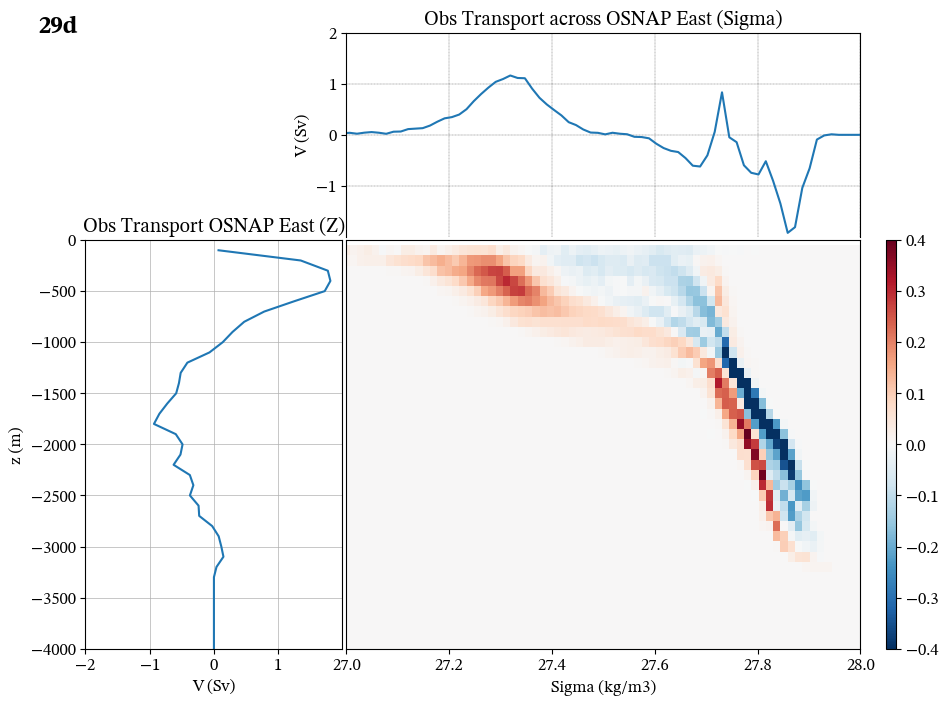

In [11]:
### Plot SigmaZ diagram and streamfunctions along OSNAP East
titleo="Obs"
section="East"
########################################rho0_ref##################
rho0=1035
sig_axis_plot_lims=[27,28]
z_axis_plot_lims=[0,4000]
rebin_depth=np.arange(100,6600,100)
spec = gridspec.GridSpec(ncols=2, nrows=2,
    width_ratios=[1,2], wspace=0.01,
    hspace=0.01, height_ratios=[1, 2])
fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(spec[3])
#####    this is different because ty_z_rho_rebin_OSNAP_east is "*1035" for obs so cancels ou the usual division by rho0 below
ch1=ax0.pcolormesh(rho0_bounds[0:-1],-rebin_depth,ty_z_rho_rebin_OSNAP_east.mean(axis=0)/1e6,vmin=-4.e-1,vmax=4.e-1,cmap='RdBu_r')
#       ch1=ax0.plot(rho_bounds[0:-1],-depth,ty_z_rho.mean(axis=0)/rho0/1e6,vmin=-5e-1,vmax=5e-1,cmap='RdBu_r')
#ax0.set_title(title+' Transport across OSNAP '+section+" (Sigma-Z)")
ax0.set_xlabel('Sigma (kg/m3)')
plt.xlim( [sig_axis_plot_lims[0],sig_axis_plot_lims[1]] ), plt.ylim( [-z_axis_plot_lims[1],-z_axis_plot_lims[0]] )
plt.yticks([])
box = ax0.get_position()
ax0.set_position([box.x0*1, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1 + box.width * 1.05, box.y0, 0.01, box.height])
plt.colorbar(ch1, cax = axColor, orientation="vertical")
#plt.show()
ax1 = fig.add_subplot(spec[1])
#ax1.grid(True)
#ax1.grid(linewidth=.5)
plt.tick_params(axis='x', color=(1,1,1,0))
ax1.plot(rho0_ref,ty_rho_east_OSNAP.mean(axis=0)/rho0/1e6)
ax1.set_title(titleo+' Transport across OSNAP '+section+" (Sigma)")
ax1.set_ylabel('V (Sv)')
ax1.text(26.4, 2,'29d' , fontsize=18, color='black',fontweight='bold')
plt.yticks(ticks=[-1,0,1,2])
plt.xticks(alpha=0.0)
plt.xlim([sig_axis_plot_lims[0],sig_axis_plot_lims[1]]), plt.ylim( [-2,2] )
ax1.spines['bottom'].set_visible(False)
plt.grid(color='black', linestyle='--', linewidth=.2)
ax2 = fig.add_subplot(spec[2])
ax2.plot(ty_z_east_OSNAP.mean(axis=0)/rho0/1e6,-rebin_depth)
ax2.set_title(titleo+' Transport OSNAP '+section+" (Z)")
ax2.set_xlabel('V (Sv)')
ax2.set_ylabel('z (m)')
ax2.grid(linewidth=.5)
plt.xticks(ticks=[-2,-1,0,1])
plt.ylim([-z_axis_plot_lims[1],-z_axis_plot_lims[0]]), plt.xlim([-2,2])
#plt.savefig("Fig_7a_AMOC_OSNAPE_Sigma_Z_Obs_202006_71TL_10_31.jpeg", **savefig_kws)
#plt.savefig("Fig_7a_AMOC_OSNAPE_Sigma_Z_Obs_202006_71TL_4_24.pdf")

((-4000.0, 0.0), (-2.0, 2.0))

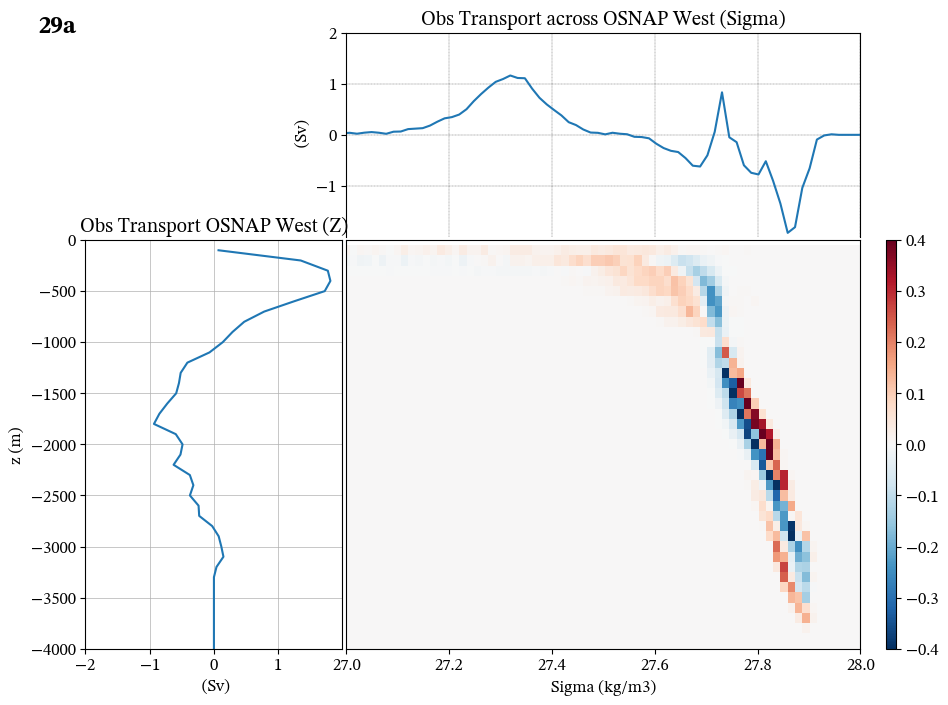

In [12]:
### Plot SigmaZ diagram and streamfunctions along OSNAP West

rho0=1035
section="West"
sig_axis_plot_lims=[27,28]
z_axis_plot_lims=[0,4000]
spec = gridspec.GridSpec(ncols=2, nrows=2,
    width_ratios=[1,2], wspace=0.01,
    hspace=0.01, height_ratios=[1, 2])
fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(spec[3])
#####    this is different because ty_z_rho_rebin_OSNAP_west is "*1035" for obs so cancels ou the usual division by rho0 below
ch1=ax0.pcolormesh(rho0_bounds[0:-1],-rebin_depth,ty_z_rho_rebin_OSNAP_west.mean(axis=0)/1e6,vmin=-4.e-1,vmax=4.e-1,cmap='RdBu_r')
#       ch1=ax0.plot(rho_bounds[0:-1],-depth,ty_z_rho.mean(axis=0)/rho0/1e6,vmin=-5e-1,vmax=5e-1,cmap='RdBu_r')
ax0.set_title(title+' Transport across OSNAP '+section+" (Sigma-Z)")
ax0.set_xlabel('Sigma (kg/m3)')
plt.xlim( [sig_axis_plot_lims[0],sig_axis_plot_lims[1]] ), plt.ylim( [-z_axis_plot_lims[1],-z_axis_plot_lims[0]] )
plt.yticks([])
box = ax0.get_position()
ax0.set_position([box.x0*1, box.y0, box.width, box.height])
axColor = plt.axes([box.x0*1 + box.width * 1.05, box.y0, 0.01, box.height])
plt.colorbar(ch1, cax = axColor, orientation="vertical")
#plt.show()
ax1 = fig.add_subplot(spec[1])
plt.tick_params(axis='x', color=(1,1,1,0))
ax1.plot(rho0_ref,ty_rho_west_OSNAP.mean(axis=0)/rho0/1e6)
ax1.set_title(titleo+' Transport across OSNAP '+section+" (Sigma)")
ax1.set_ylabel(' (Sv)')
ax1.text(26.4, 2,'29a' , fontsize=18, color='black',fontweight='bold')
plt.yticks(ticks=[-1,0,1,2])
plt.xticks(alpha=0.0)
plt.xlim([sig_axis_plot_lims[0],sig_axis_plot_lims[1]]), plt.ylim( [-2,2] )
ax1.spines['bottom'].set_visible(False)
plt.grid(color='black', linestyle='--', linewidth=.2)
ax2 = fig.add_subplot(spec[2])
ax2.plot(ty_z_west_OSNAP.mean(axis=0)/rho0/1e6,-rebin_depth)
ax2.set_title(titleo+' Transport OSNAP '+section+" (Z)")
ax2.set_xlabel(' (Sv)')
ax2.set_ylabel('z (m)') 
ax2.grid(linewidth=.5)
plt.xticks(ticks=[-2,-1,0,1])
plt.ylim([-z_axis_plot_lims[1],-z_axis_plot_lims[0]]), plt.xlim([-2,2])
#plt.savefig("Fig_8a_AMOC_OSNAPW_Sigma_Z_Obs_202006_71TL.jpeg", **savefig_kws)
#plt.savefig("Fig_8a_AMOC_OSNAPW_Sigma_Z_Obs_202006_71TL.pdf")

Text(860000, -1600, 'ISO')

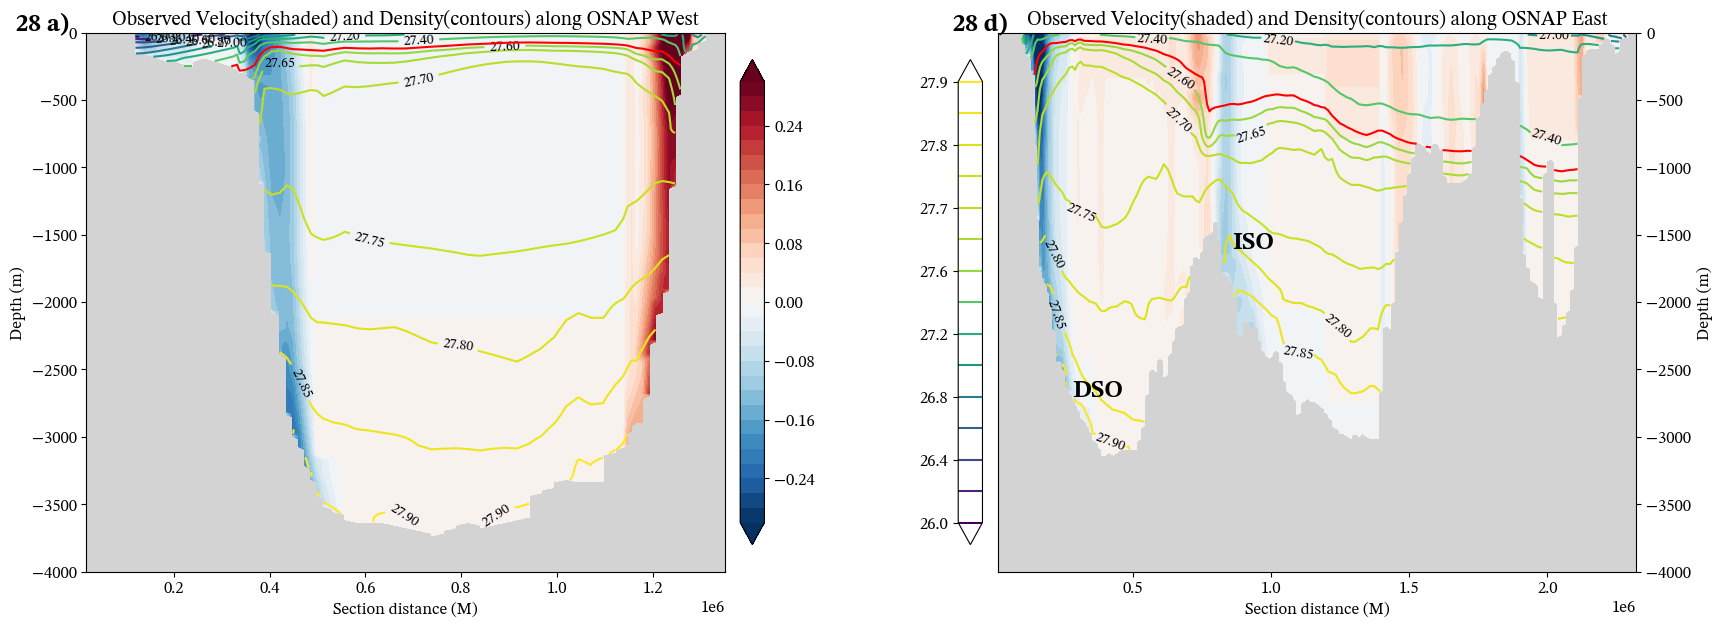

In [13]:
### Plot cross-sections of V, T, S and Rho along OSNAP East and West
plt.rcParams.update({"font.size":12})
figsize=[6.5,4.0]
savefig_kws=dict(bbox_inches="tight", facecolor="white", dpi=400, format='jpeg')
degC= "$^{\circ}$C"
# Use the same font as JAMES
dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'
######################################################
PD_OSNAP_west[np.where(PD_OSNAP_west==0)]=np.nan
Transp_OSNAP_west[np.where(Transp_OSNAP_west==0)]=np.nan

if numpy_algo: Area_west=Area_west[0,:,:]
fig = plt.figure(figsize=(20,7))
fig.subplots_adjust(wspace=0.015) 
ax = fig.add_subplot(1,2,1)
ax.set_facecolor('lightgrey')
blah=ax.contourf(np.cumsum(section_gridwidth_OSNAP_west)*1000,-depth_OSNAP,Transp_OSNAP_west.mean(axis=0)/Area_west,levels=np.linspace(-.3,.3,num=31),extend='both',cmap='RdBu_r')
plt.colorbar(blah,aspect=20,shrink=.9,pad=.02)
vlah=ax.contour(np.cumsum(section_gridwidth_OSNAP_west)*1000,-depth_OSNAP,PD_OSNAP_west.mean(axis=0),levels=(26.,26.2,26.4,26.6,26.8,27,27.2,27.4,27.6,27.65,27.7,27.75,27.8,27.85,27.9),extend='both')
plt.clabel(vlah, inline=True, fontsize=10,zorder=2,colors=["black"])
if numpy_algo==False: maxAMOC_contour=ax.contour(np.cumsum(section_gridwidth_OSNAP_west)*1000,-depth_OSNAP,PD_OSNAP_west.mean(axis=0),levels=[AMOCrho_west_OSNAP.mean('time').idxmax('rho_bin')],colors=["red"])
#plt.colorbar(vlah)
ax.set_title('Observed Velocity(shaded) and Density(contours) along OSNAP West')
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Section distance (M)')
plt.ylim([-4000,0])
ax.text(-130000, 20, "28 a)", fontsize=18, color='black',fontweight='bold')
ax = fig.add_subplot(1,2,2)
ax.set_facecolor('lightgrey')
PD_OSNAP_east[np.where(PD_OSNAP_east==0)]=np.nan
Transp_OSNAP_east[np.where(Transp_OSNAP_east==0)]=np.nan
if numpy_algo: Area_east=Area_east[0,:,:]


blah=ax.contourf(np.cumsum(section_gridwidth_OSNAP_east)*1000,-depth_OSNAP,Transp_OSNAP_east.mean(axis=0)/Area_east,levels=np.linspace(-.3,.3,num=31),extend='both',cmap=('RdBu_r'))
vlah=ax.contour(np.cumsum(section_gridwidth_OSNAP_east)*1000,-depth_OSNAP,PD_OSNAP_east.mean(axis=0),levels=(26.,26.2,26.4,26.6,26.8,27,27.2,27.4,27.6,27.65,27.7,27.75,27.8,27.85,27.9),extend='both')

if numpy_algo==False: maxAMOC_contour=ax.contour(np.cumsum(section_gridwidth_OSNAP_east)*1000,-depth_OSNAP,PD_OSNAP_east.mean(axis=0),levels=[AMOCrho_east_OSNAP.mean('time').idxmax('rho_bin')],colors=["red"])

ax.set_title('Observed Velocity(shaded) and Density(contours) along OSNAP East')
ax.set_ylabel('Depth (m)')
plt.ylim([-4000,0])
plt.clabel(vlah, inline=True, fontsize=10,zorder=2,colors=["black"])

#ax.set_title(title+' Velocity(shaded) and Density(contours) along OSNAP East')
ax.yaxis.tick_right()              # Move ticks
ax.yaxis.set_label_position("right")  # Move label 
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Section distance (M)')
plt.ylim([-4000,0])
plt.colorbar(vlah,shrink=.9,location='left',aspect=20,pad=.02)
#ax.text(-100000, -4400, "44.9W, 60.3N", fontsize=12, color='black',fontweight='bold')
#ax.text(2500000, -4400, "5.9W, 56.5N", fontsize=12, color='black',fontweight='bold')
ax.text(-150000, 20, "28 d)", fontsize=18, color='black',fontweight='bold')
ax.text(280000, -2700, "DSO", fontsize=18, color='black',fontweight='bold')
ax.text(860000, -1600, "ISO", fontsize=18, color='black',fontweight='bold')


In [ ]:
#end of Sigmaz OBS notebook